In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import Callback


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [5]:
from anomalymodels import *

In [6]:
basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetanomaly'


In [7]:
file_dict = {'train':os.path.join(basedir, 'autoencoder_train.pt'),
             'val':os.path.join(basedir, 'autoencoder_val.pt'),
             'test':os.path.join(basedir, 'autoencoder_predict.pt'),
             'predict':os.path.join(basedir, 'autoencoder_predict.pt')}

In [8]:
jet_dm = AnomalyDataModule(file_dict,2500)

In [10]:
model = AutoEncoder() 

In [11]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder_anomaly",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder-anomaly/3e742341e66f46bdb1e31ba53673787d



In [12]:
comet_logger = CometLogger(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder_anomaly",
)

CometLogger will be initialized in online mode


In [13]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=3, verbose=False)

In [14]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/analysis/autoencoder_checkpoints",
    filename="autoencoder-paper1-checkpoint-{epoch:02d}-{val_loss:.3f}",
    save_top_k=4,
    mode="min",
)

In [15]:
class PrintCallbacks(Callback):
    def on_init_start(self, trainer):
        print("Starting to init trainer!")

    def on_init_end(self, trainer):
        print("Trainer is init now")

    def on_train_end(self, trainer, pl_module):
        print("Training ended")

In [16]:
trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Starting to init trainer!
Trainer is init now


In [17]:
lr_finder = trainer.tuner.lr_find(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/analysis/lr_find_temp_model_834094a9-66cb-4a0a-bc0e-99edc9cddc1f.ckpt


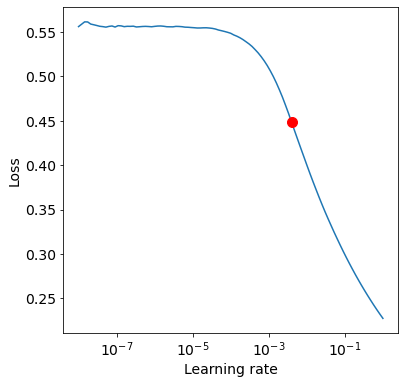

In [18]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [19]:
new_lr = lr_finder.suggestion()
model.hparams.learning_rate = new_lr
model.learning_rate = new_lr

In [20]:
new_lr

0.003981071705534969

In [21]:
trainer.fit(model, jet_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-anomaly/3e742341e66f46bdb1e31ba53673787d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [20] : (0.018077343702316284, 0.563739538192749)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.04 MB)
COM

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-anomaly/9328261273d442b1a701c198ba01241b
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [800]          : (0.013081843964755535, 0.5512410402297974)
COMET INFO:     train_loss [80]     : (0.013460400514304638, 0.02114005945622921)
COMET INFO:     val_loss_epoch [10] : (0.013675238937139511, 0.017622847110033035)
COMET INFO:     val_loss_step [800] : (0.011273683980107307, 0.0209090523421

Training ended


COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...


In [14]:
from anomalymodels import *

In [15]:
model = MLP() 

In [16]:
file_dict = {'train':os.path.join(basedir, 'mlp_train.pt'),
             'val':os.path.join(basedir, 'mlp_val.pt'),
             'test':os.path.join(basedir, 'mlp_predict.pt'),
             'predict':os.path.join(basedir, 'mlp_predict.pt')}

In [17]:
jet_dm = AnomalyDataModule(file_dict,2500)

In [18]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/analysis/mlp_checkpoints",
    filename="mlp-paper1-checkpoint-{epoch:02d}-{val_loss:.2f}",
    save_top_k=4,
    mode="min",
)

In [19]:
trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Starting to init trainer!
Trainer is init now


In [20]:
lr_finder = trainer.tuner.lr_find(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/analysis/lr_find_temp_model_2e515c90-d3ee-44a3-999d-0d3bdbc2c144.ckpt


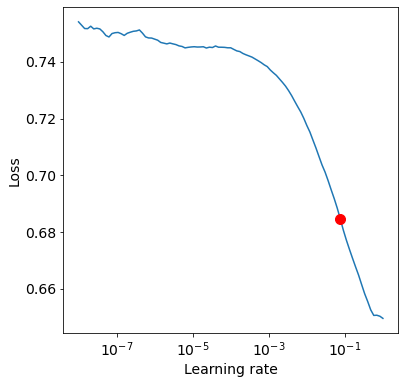

In [21]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [22]:
trainer.fit(model, jet_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-anomaly/34f1802cc98b4c85ab3b2ca3a839db47
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [20] : (0.528759241104126, 0.760893702507019)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.04 MB)
COMET 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder-anomaly/86fe379b800a4bcd894a5e288cb0f798
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [2880]          : (0.2565816640853882, 0.7664341330528259)
COMET INFO:     train_loss [288]     : (0.2652098834514618, 0.5670609474182129)
COMET INFO:     val_loss_epoch [18]  : (0.22827619314193726, 0.2868516147136688)
COMET INFO:     val_loss_step [2880] : (0.16079166531562805, 0.4115241467952728)


Training ended


COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
